In [74]:
import numpy as np
import pandas as pd

import datetime

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors

import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

df_fullcleaned = pd.read_csv(r'C:\Users\Admin\Desktop\E_commerce_proj\data\output\data_full_cleaned.csv')

In [75]:
numberic_columns = ['index', 'Qty', 'Amount', 'Product Rating', 
                     'NumReturns', 'Customer_Score', 'Loyalty_Points', 
                     'Discount_Usage', 'Referral_Count', 'MntAccessories', 'MntElectronics',
                     'MntClothing', 'MntHomeDecor', 'NumGiftPurchases', 'NumHolidayPurchases', 
                     'NumSpecialOffers', 'NumSocialMediaShares', 'NumLoyaltyVisits']

df_fullcleaned.info()
df_fullcleaned[numberic_columns].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 15000 non-null  int64  
 1   Order ID              15000 non-null  object 
 2   Date                  15000 non-null  object 
 3   Status                15000 non-null  object 
 4   Fulfilment            15000 non-null  object 
 5   Sales Channel         15000 non-null  object 
 6   ship-service-level    15000 non-null  object 
 7   Style                 15000 non-null  object 
 8   SKU                   15000 non-null  object 
 9   Category              15000 non-null  object 
 10  Size                  15000 non-null  object 
 11  ASIN                  15000 non-null  object 
 12  Courier Status        15000 non-null  object 
 13  Qty                   15000 non-null  int64  
 14  currency              15000 non-null  object 
 15  Amount             

,index,Qty,Amount,Product Rating,NumReturns,Customer_Score,Loyalty_Points,Discount_Usage,Referral_Count,MntAccessories,MntElectronics,MntClothing,MntHomeDecor,NumGiftPurchases,NumHolidayPurchases,NumSpecialOffers,NumSocialMediaShares,NumLoyaltyVisits
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.0000,15000.000000
mean,7499.500000,0.901267,588.136883,3.622000,1.994933,82.821333,1787.585800,7.018200,3.887467,959.874394,1919.748789,1439.811592,479.937197,4.491400,1.996000,9.532533,24.5382,17.379467
std,4330.271354,0.354298,169.631454,1.280479,1.414534,20.868654,803.694664,4.342863,1.267692,638.394905,1276.789810,957.592358,319.197453,2.863577,1.412982,5.759035,14.4734,8.043701
min,0.000000,0.000000,0.000000,1.000000,0.000000,50.000000,551.000000,0.000000,2.000000,51.973552,103.947104,77.960328,25.986776,0.000000,0.000000,0.000000,0.0000,5.000000
25%,3749.750000,1.000000,568.000000,3.000000,1.000000,60.000000,1070.000000,3.000000,3.000000,447.883128,895.766257,671.824693,223.941564,2.000000,1.000000,5.000000,12.0000,10.000000
50%,7499.500000,1.000000,568.000000,4.000000,2.000000,100.000000,1729.000000,7.000000,5.000000,803.789202,1607.578404,1205.683803,401.894601,4.000000,2.000000,10.000000,25.0000,17.000000
75%,11249.250000,1.000000,568.000000,5.000000,3.000000,100.000000,2363.000000,11.000000,5.000000,1363.472420,2726.944840,2045.208630,681.736210,7.000000,3.000000,15.000000,37.0000,23.000000
max,14999.000000,15.000000,2198.000000,5.000000,4.000000,100.000000,3977.000000,14.000000,5.000000,2977.753575,5955.507150,4466.630363,1488.876788,9.000000,4.000000,19.000000,49.0000,39.000000


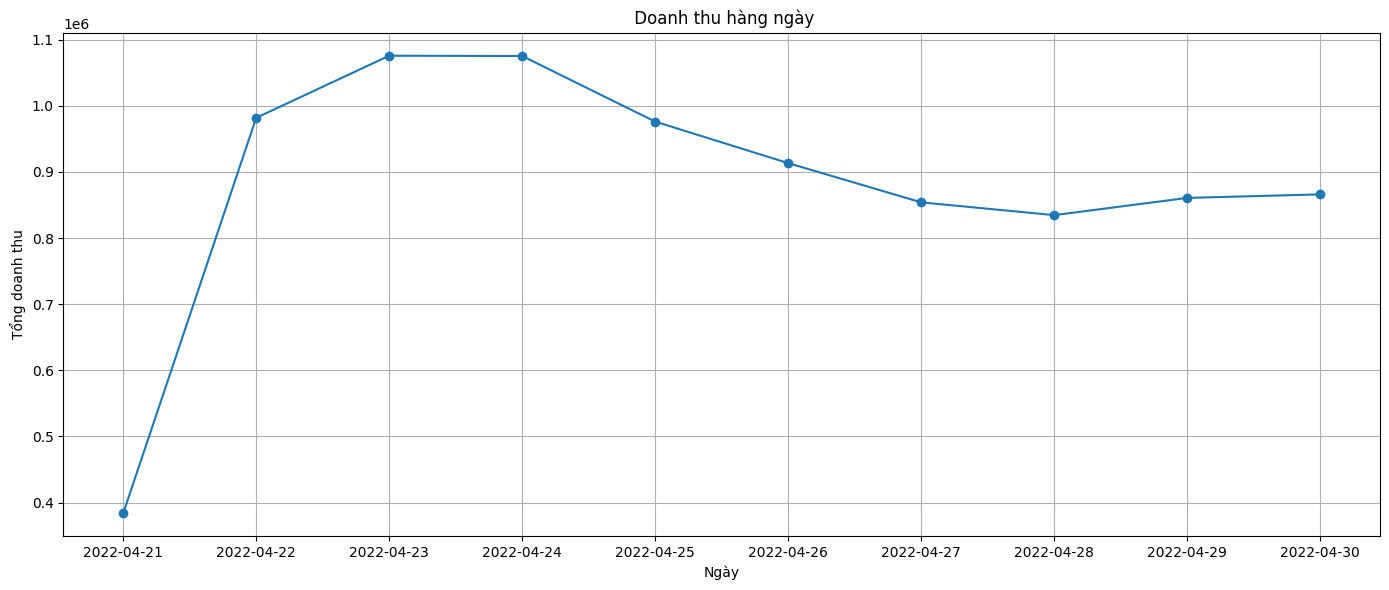

In [76]:


# Convert 'Date' to datetime format
df_fullcleaned['Date'] = pd.to_datetime(df_fullcleaned['Date'], errors='coerce')

# Group by day and sum the Amount
daily_revenue = df_fullcleaned.groupby('Date')['Amount'].sum().reset_index()

# Plot daily revenue
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(daily_revenue['Date'], daily_revenue['Amount'], marker='o')
plt.title(' Doanh thu hàng ngày')
plt.xlabel('Ngày')
plt.ylabel('Tổng doanh thu')
plt.grid(True)
plt.tight_layout()
plt.show()


Đây là biểu đồ doanh thu theo từng ngày, được tính dựa trên cột Amount trong dữ liệu đã làm sạch.

Có một đợt tăng mạnh doanh thu vào 21–23/04/2022 — có thể liên quan đến chương trình khuyến mãi hoặc ngày đặc biệt.

Sau đó, doanh thu có xu hướng giảm nhẹ nhưng vẫn ổn định cho đến cuối tháng.

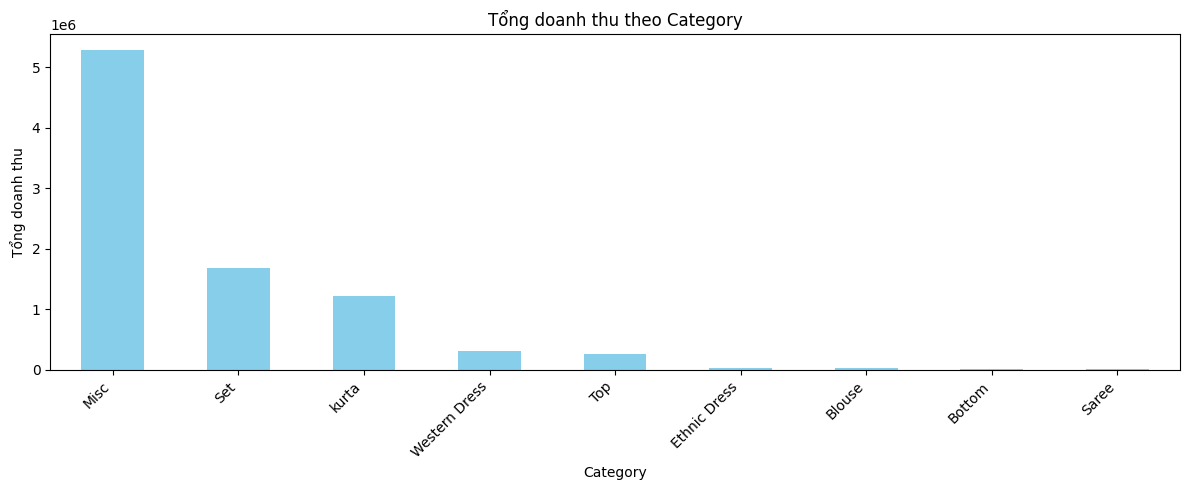

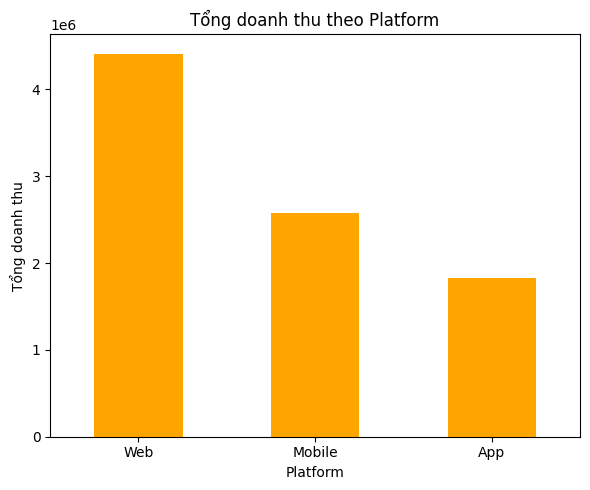

In [77]:
# Load the newly uploaded cleaned dataset


# Tính tổng doanh thu theo Category
revenue_by_category = df_fullcleaned.groupby('Category')['Amount'].sum().sort_values(ascending=False)

# Cộng tất cả Amount cho từng Category


# Tính tổng doanh thu theo Platform
revenue_by_platform = df_fullcleaned.groupby('Platform')['Amount'].sum().sort_values(ascending=False)

# Vẽ biểu đồ doanh thu theo Category
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
revenue_by_category.plot(kind='bar', color='skyblue')
plt.title('Tổng doanh thu theo Category')
plt.ylabel('Tổng doanh thu')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Vẽ biểu đồ doanh thu theo Platform
plt.figure(figsize=(6, 5))
revenue_by_platform.plot(kind='bar', color='orange')
plt.title('Tổng doanh thu theo Platform')
plt.ylabel('Tổng doanh thu')
plt.xlabel('Platform')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


1. Theo Category:
- Misc chiếm phần lớn doanh thu (có thể là nhóm hàng không rõ danh mục hoặc lỗi ghi dữ liệu).

- Các danh mục đóng góp tốt:

- Set, Kurta, Western Dress, Top

- Nhóm có doanh thu rất thấp: Bottom, Saree, Blouse → có thể cần cải thiện marketing hoặc sản phẩm.

 2. Theo Platform:
- Web mang lại doanh thu cao nhất.

- Mobile cũng chiếm tỷ lệ lớn, nhưng thấp hơn Web.

- App xếp thứ 3 nhưng vẫn đáng kể → có tiềm năng nếu tối ưu hóa UX/app.


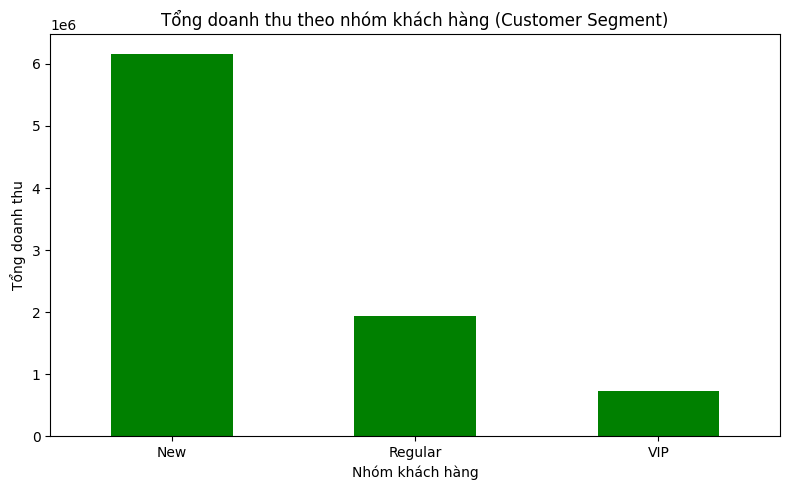

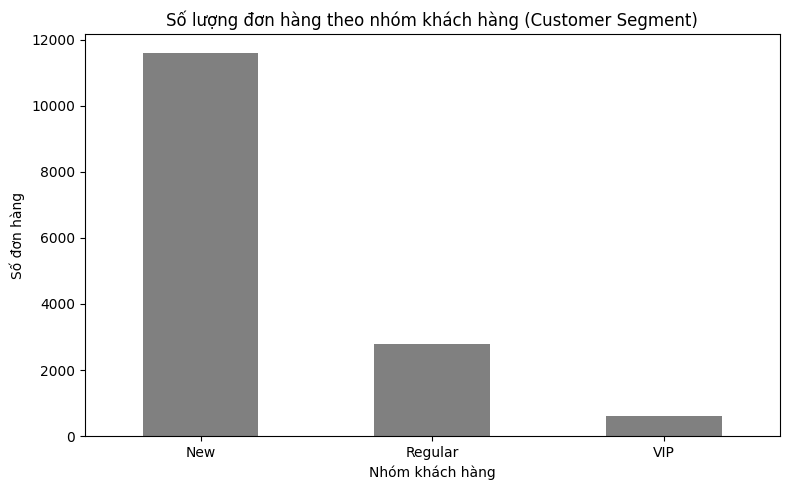

In [78]:
# Tính tổng doanh thu theo Customer Segment
revenue_by_segment =df_fullcleaned.groupby('Customer Segment')['Amount'].sum().sort_values(ascending=False)

# Đếm số đơn hàng theo từng nhóm khách hàng
order_count_by_segment =df_fullcleaned['Customer Segment'].value_counts()

# Vẽ biểu đồ doanh thu theo nhóm khách hàng
plt.figure(figsize=(8, 5))
revenue_by_segment.plot(kind='bar', color='green')
plt.title('Tổng doanh thu theo nhóm khách hàng (Customer Segment)')
plt.ylabel('Tổng doanh thu')
plt.xlabel('Nhóm khách hàng')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Vẽ biểu đồ số lượng đơn hàng theo nhóm khách hàng
plt.figure(figsize=(8, 5))
order_count_by_segment.plot(kind='bar', color='gray')
plt.title('Số lượng đơn hàng theo nhóm khách hàng (Customer Segment)')
plt.ylabel('Số đơn hàng')
plt.xlabel('Nhóm khách hàng')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Phân tích nhóm khách hàng (Customer Segment):

 Doanh thu theo nhóm:

+ New (khách mới): tạo ra doanh thu lớn nhất và chiếm gần như toàn bộ đơn hàng.

+ Regular (khách quay lại): có doanh thu khá nhưng không nổi bật.
 
+ VIP (chi tiêu cao): ít đơn hàng nhưng giá trị đơn mỗi đơn cao hơn.

 Số lượng đơn hàng:
+ New chiếm áp đảo về số đơn → cơ hội chuyển đổi họ thành Regular hoặc VIP nếu chăm sóc tốt.

+ VIP rất ít đơn nhưng vẫn tạo doanh thu ổn → nhóm đáng để đầu tư ưu đãi riêng biệt.

 Tùy theo đó ta có thể đưa ra chiến lược tùy ý. VD:
 + Tạo chương trình giữ chân khách mới → chuyển họ sang nhóm Regular.

 + Đưa ra ưu đãi độc quyền cho VIP (freeship, support riêng, coupon cá nhân hóa).

 + Tái kích hoạt Regular chưa mua lại → thông qua email hoặc đề xuất cá nhân.

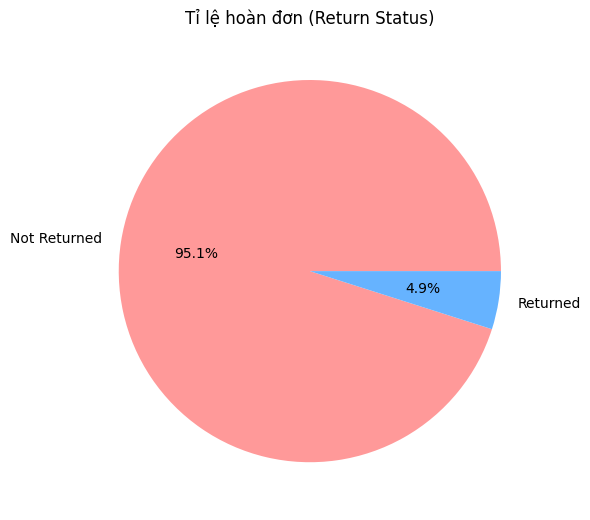

In [79]:



# Tính số lượng đơn hàng theo Return Status
return_counts = df_fullcleaned['Return Status'].value_counts()

# Tính tỉ lệ phần trăm hoàn đơn
return_percentage = (return_counts / return_counts.sum()) * 100

# Vẽ biểu đồ tròn thể hiện tỉ lệ hoàn đơn
plt.figure(figsize=(6, 6))
plt.pie(return_percentage, labels=return_percentage.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Tỉ lệ hoàn đơn (Return Status)')
plt.tight_layout()
plt.show()


Tỉ lệ hoàn đơn (Return Status):

- Not Returned: chiếm khoảng 95%

- Returned: chiếm khoảng 5%

 Nhận xét:
- Tỉ lệ hoàn đơn thấp 

Tuy nhiên, cần phân tích thêm

- Có tập trung ở Platform nào không?

- Sản phẩm nào có tỉ lệ hoàn cao hơn?

- Khách hàng nhóm nào (New, VIP) thường hoàn hàng?

<Axes: >

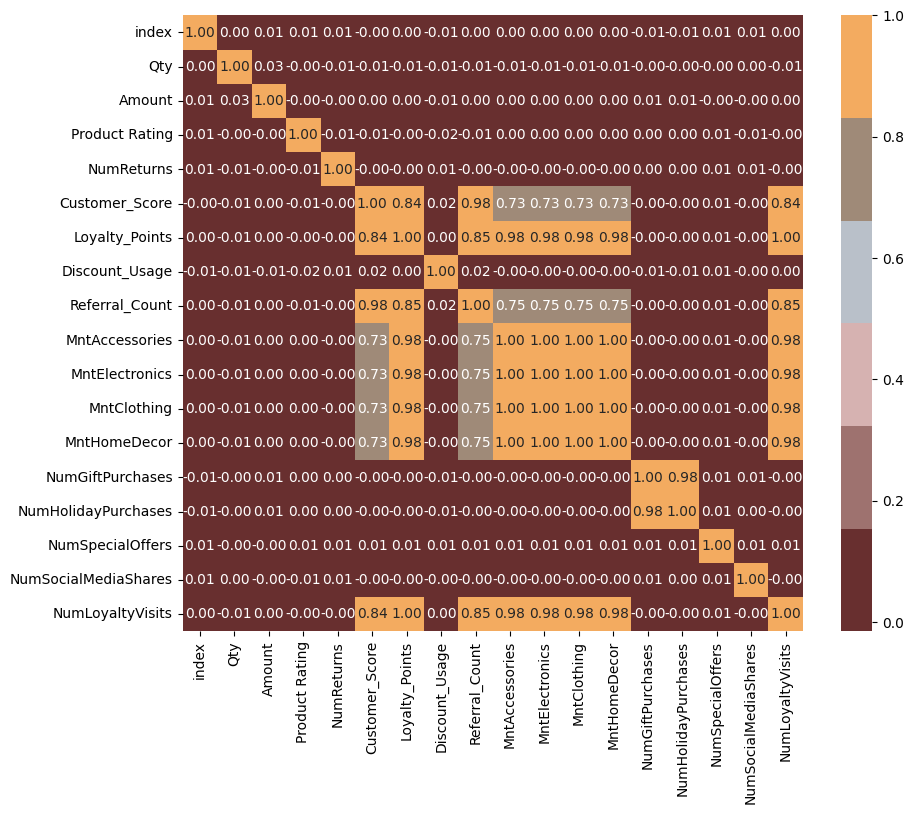

In [80]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

# Ma trận tương quan giữa các cột dữ liệu
plt.figure(figsize=(10,8))
sns.heatmap(df_fullcleaned[numberic_columns].corr(), annot=True, cmap=cmap, fmt=".2f")

DỮ LIỆU SAU KHI CLEAN KHÁ ĐẸP, HẦU NHƯ CÁC THAM SỐ CHỈ DƯỚI 1


In [ ]:
#vẽ biểu đồ boxplot cho các feature